<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/Case_Study_on_Preprocessing_shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("/content/House_Pricing.csv")

In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [5]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [7]:
df = df.drop(columns = ["Renovated Year"])#biased value and we have
df = df.drop(columns = ["ID"])
df = df.drop(columns = ["Date House was Sold"])

In [8]:
df.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,53.505425,0.138565,0.140830,685.404255,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.duplicated().sum()

np.int64(5)

In [11]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19485
Condition of the House,0
Overall Grade,0


In [14]:
df = df.dropna(subset=['Sale Price'])

In [15]:
df = df.drop(columns = ['No of Times Visited'])#due to more missing values

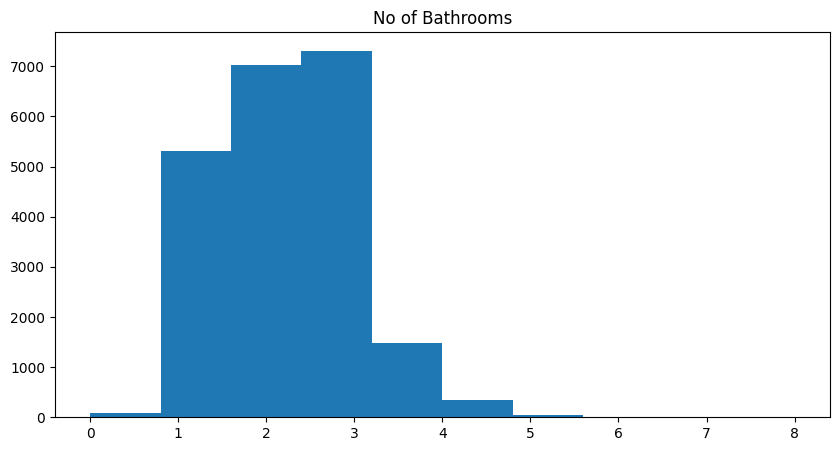

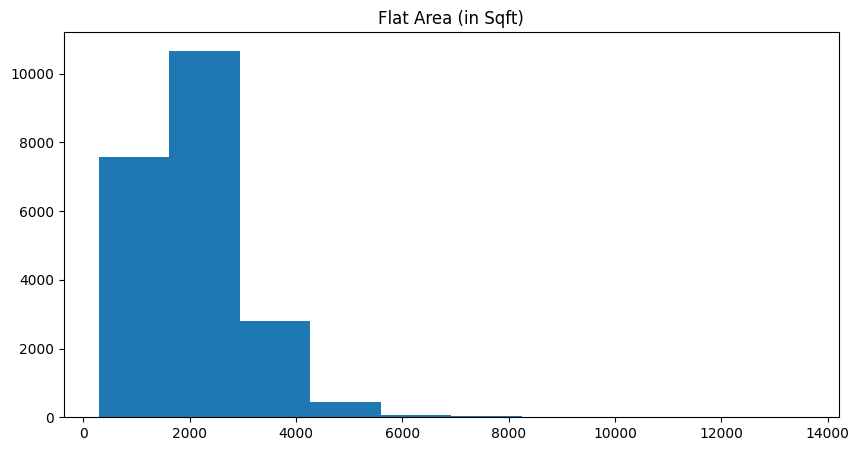

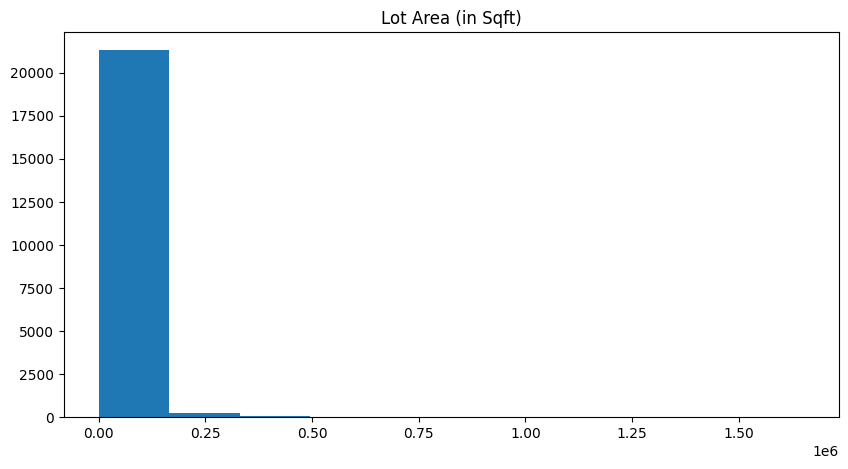

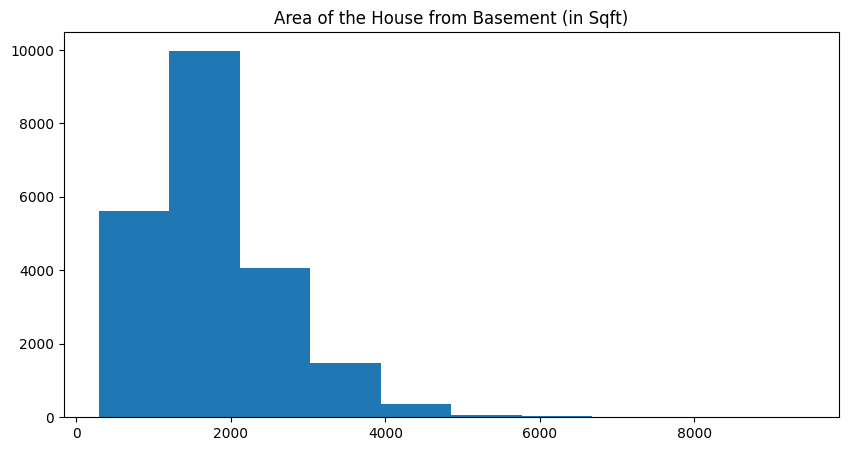

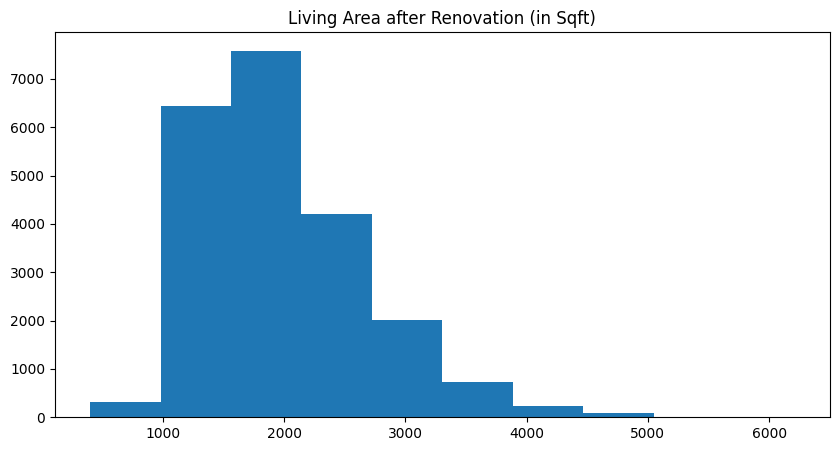

In [16]:
c = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
     'Living Area after Renovation (in Sqft)']
for i in c:
  plt.figure(figsize=(10,5))
  plt.hist(df[i])
  plt.title(i)


In [18]:
df['No of Bathrooms'] = df['No of Bathrooms'].fillna(df['No of Bathrooms'].median())
df['Flat Area (in Sqft)'] = df['Flat Area (in Sqft)'].fillna(df['Flat Area (in Sqft)'].median())
df['Lot Area (in Sqft)'] = df['Lot Area (in Sqft)'].fillna(df['Lot Area (in Sqft)'].median())
df['Living Area after Renovation (in Sqft)'] = df['Living Area after Renovation (in Sqft)'].fillna(df['Living Area after Renovation (in Sqft)'].median())

In [19]:
df['Area of the House from Basement (in Sqft)'] = df['Area of the House from Basement (in Sqft)'].fillna(df['Area of the House from Basement (in Sqft)'].median())

In [20]:
df = df.dropna(subset = ['Longitude','Latitude'])

In [21]:
df['Zipcode'] = df['Zipcode'].fillna(df['Zipcode'].mode()[0])# categorical value

In [22]:
df.isnull().sum()

,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0
Area of the House from Basement (in Sqft),0


In [23]:
df.shape

(21602, 17)

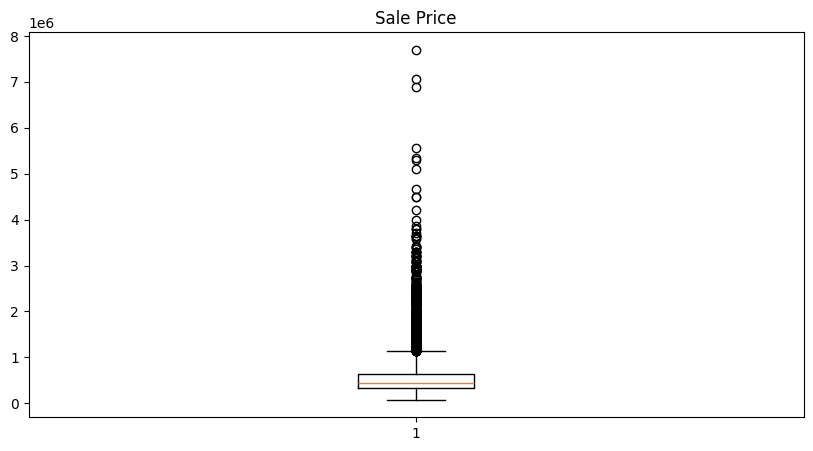

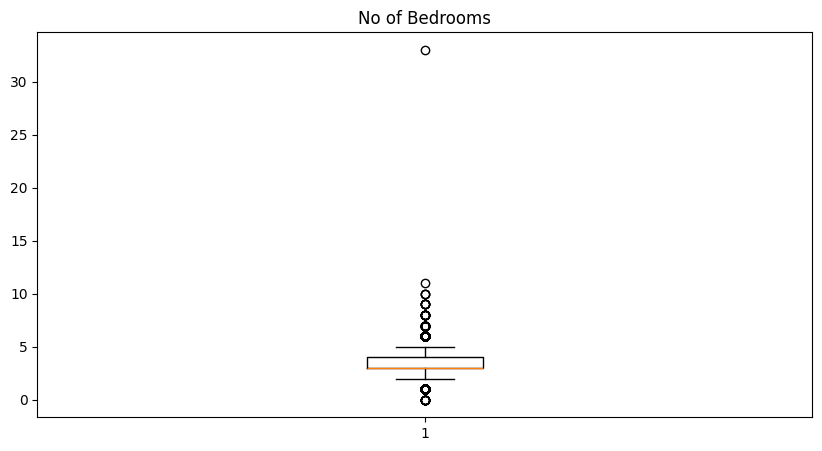

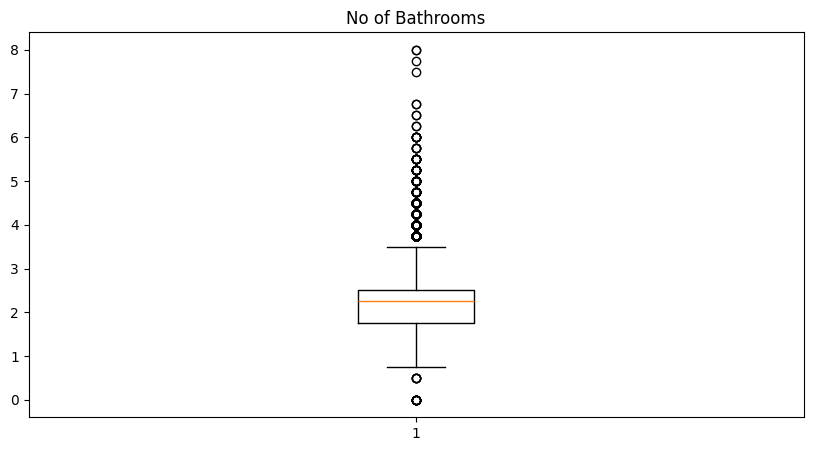

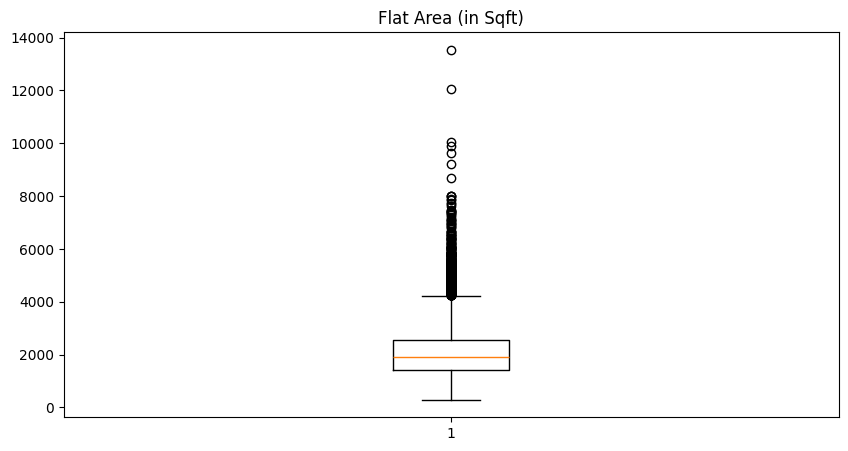

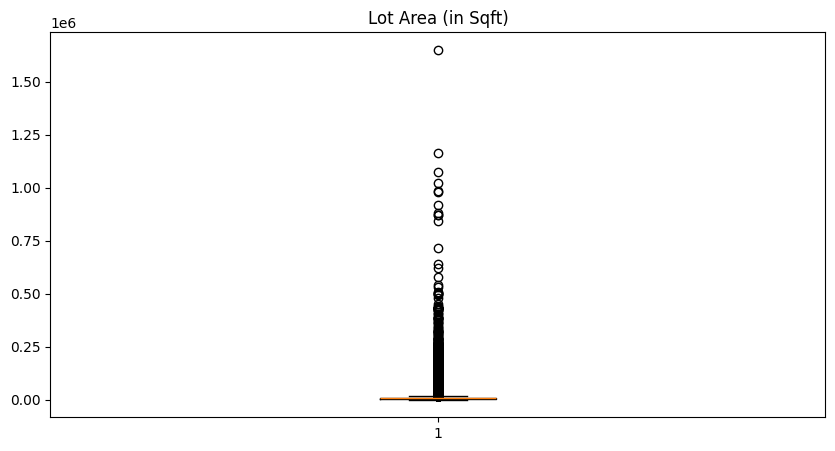

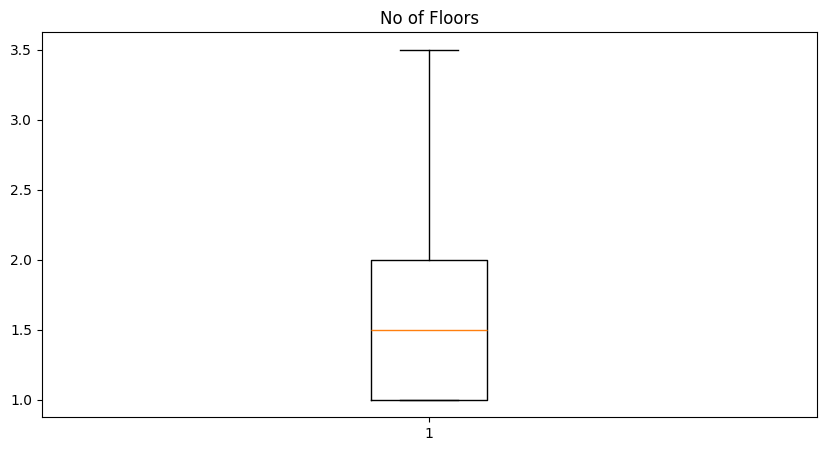

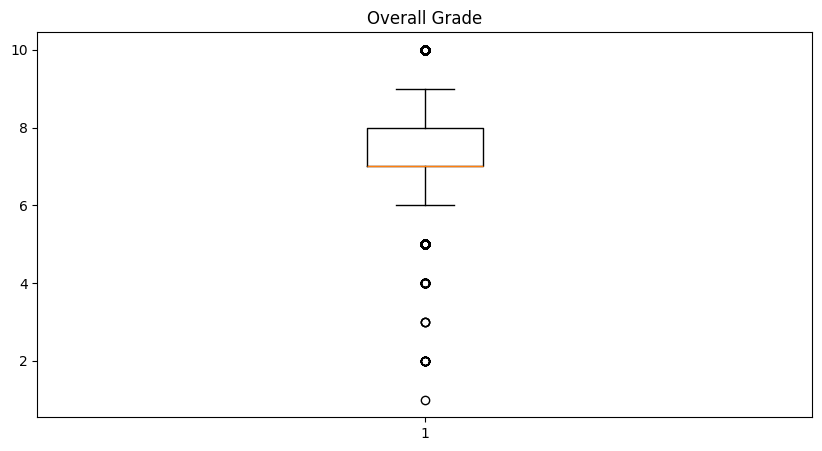

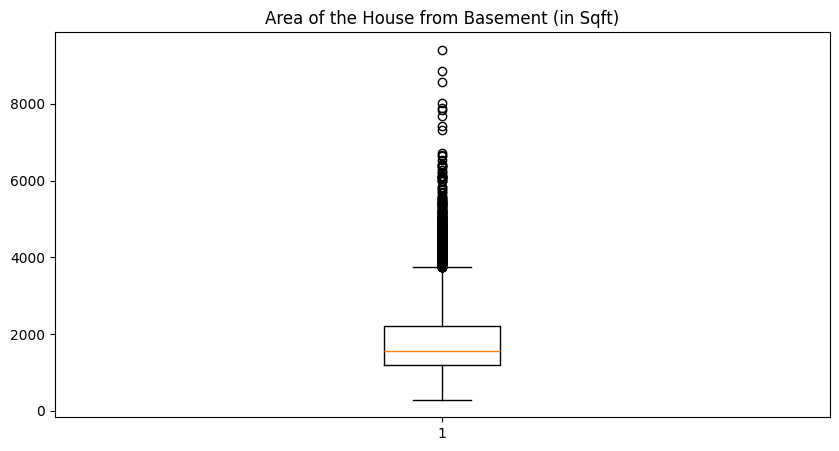

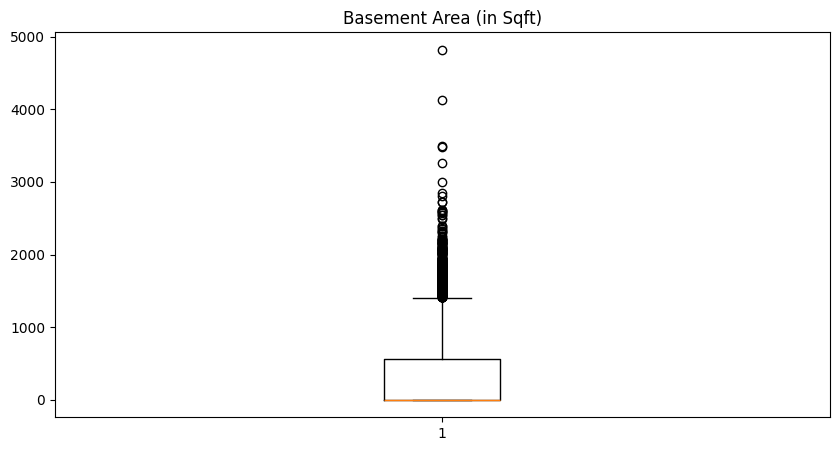

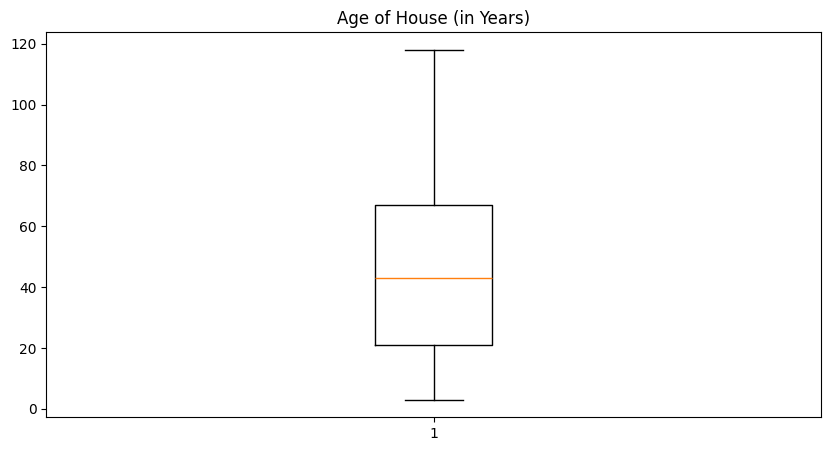

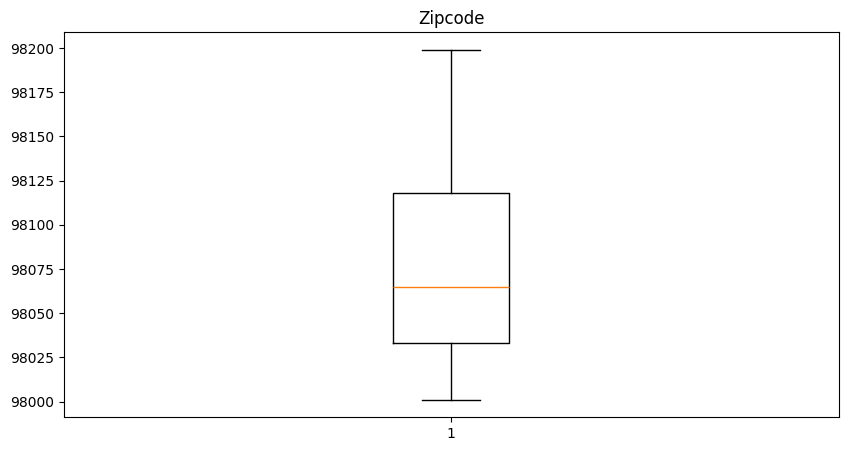

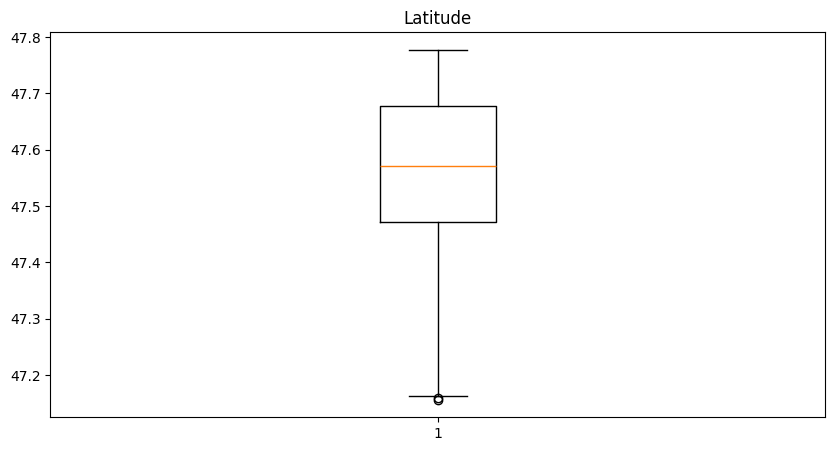

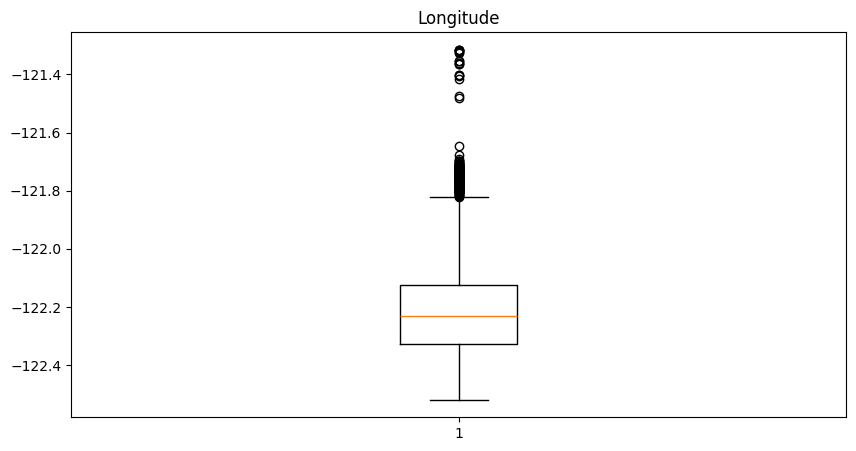

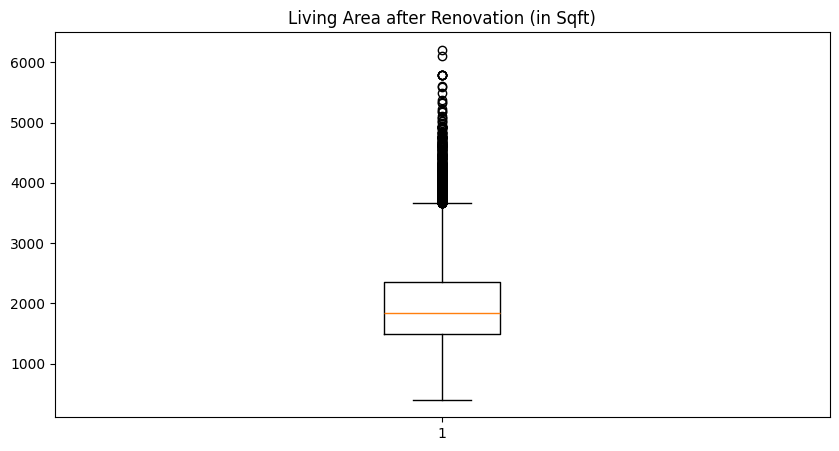

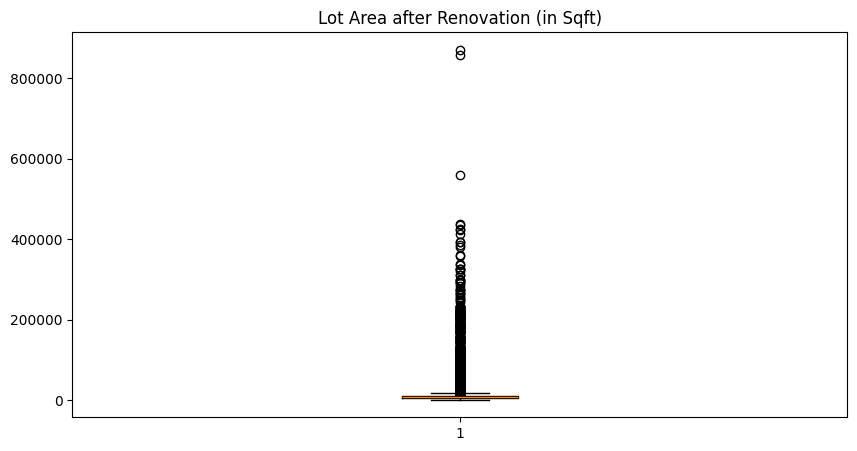

In [24]:
num_columns = df.select_dtypes(include=["float64","int64"])
for i in num_columns:
  plt.figure(figsize=(10,5))
  plt.boxplot(df[i])
  plt.title(i)


In [25]:
bathrooms = df["No of Bathrooms"]

Q1 = bathrooms.quantile(0.25)
Q3 = bathrooms.quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

df["No of Bathrooms"] = bathrooms.clip(lower=lower_cap, upper=upper_cap)

In [26]:
c = df["Overall Grade"]

Q1 = c.quantile(0.25)
Q3 = c.quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

df["Overall Grade"] = c.clip(lower=lower_cap, upper=upper_cap)

In [27]:
df['Flat Area (in Sqft)'] = np.log1p(df["Flat Area (in Sqft)"])

In [28]:
df['Lot Area (in Sqft)'] = np.log1p(df["Lot Area (in Sqft)"])
df["Living Area after Renovation (in Sqft)"] = np.log1p(df["Living Area after Renovation (in Sqft)"])
df["Basement Area (in Sqft)"] = np.log1p(df["Basement Area (in Sqft)"])
df['Sale Price'] = np.log1p(df['Sale Price'])
df['Area of the House from Basement (in Sqft)'] = np.log1p(df['Area of the House from Basement (in Sqft)'])
df['Lot Area after Renovation (in Sqft)'] = np.log1p(df['Lot Area after Renovation (in Sqft)'])

In [29]:
b = df["No of Bedrooms"]

Q1 = b.quantile(0.25)
Q3 = b.quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

df["No of Bedrooms"] = b.clip(lower=lower_cap, upper=upper_cap)

In [30]:
from scipy.stats.mstats import winsorize

df["Longitude"] = winsorize(df["Longitude"], limits=[0.05, 0.05])

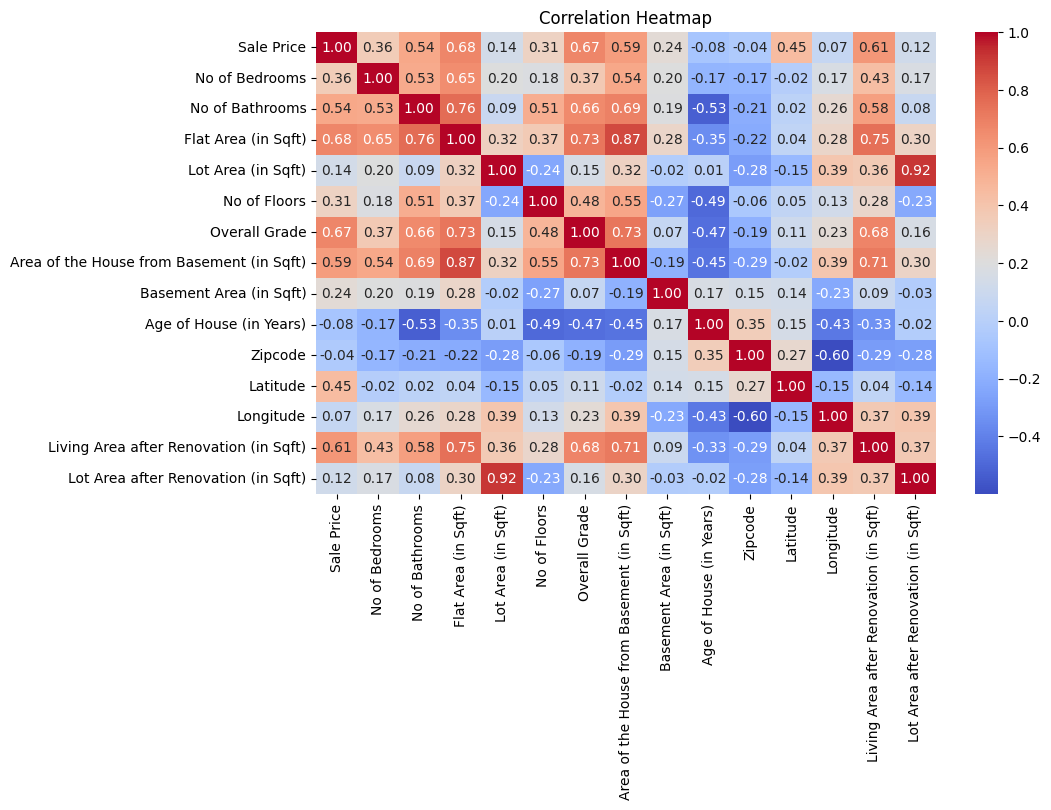

In [31]:
num_cols = df.select_dtypes(include = ['int64','float64'])
corr = num_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
df = df.drop(columns = ['Area of the House from Basement (in Sqft)'])# high correlation with flat area(0.88) and flat area have more correlation with sale price compare to this feature

Encoding

In [32]:
df.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [33]:
df["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [34]:
ordinal_enc = OrdinalEncoder(categories=[['Bad','Okay','Fair','Good','Excellent']])
df['Condition of the House'] = ordinal_enc.fit_transform(df[['Condition of the House']])
df['Condition of the House']

,Condition of the House
0,2.0
1,2.0
2,2.0
3,4.0
4,2.0
...,...
21608,2.0
21609,2.0
21610,2.0
21611,2.0


In [35]:
df = pd.get_dummies(df,
                    columns = ['Waterfront View'],
                    prefix='w',
                    drop_first = True,
                    dtype = 'int64'
                    )

In [36]:
df.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'w_Yes'],
      dtype='object')

In [37]:
df['No of Floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [38]:
df['w_Yes']

,w_Yes
0,0
1,0
2,0
3,0
4,0
...,...
21608,0
21609,0
21610,0
21611,0


In [39]:
freq = df['Zipcode'].value_counts()
df['Zipcode'] = df['Zipcode'].map(freq)

In [40]:
df['Zipcode']

,Zipcode
0,262
1,410
2,283
3,263
4,440
...,...
21608,602
21609,288
21610,343
21611,411


Scaling

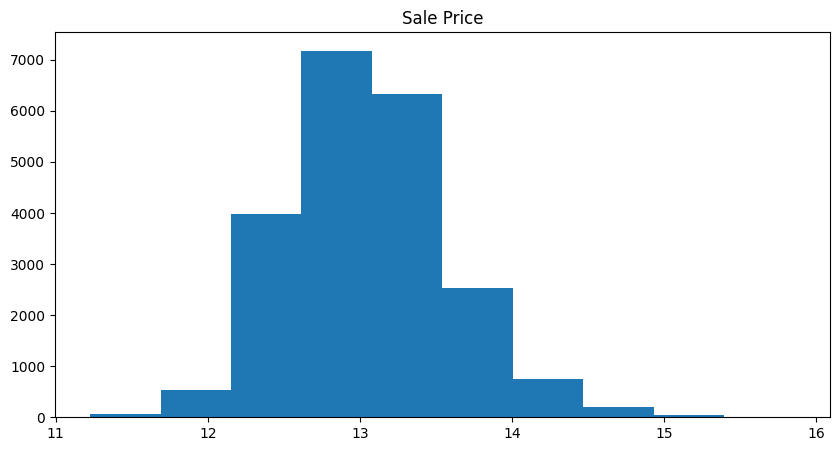

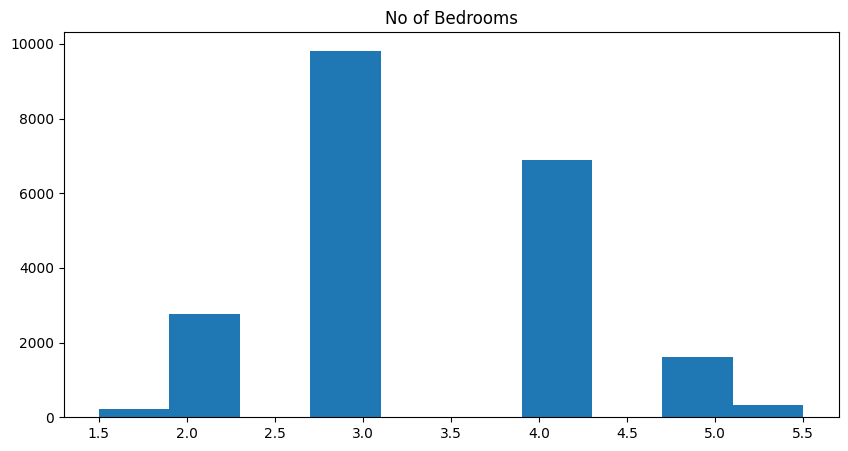

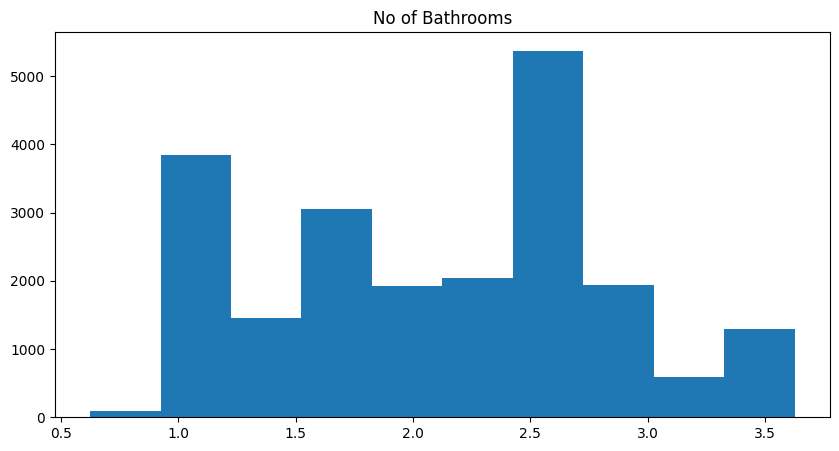

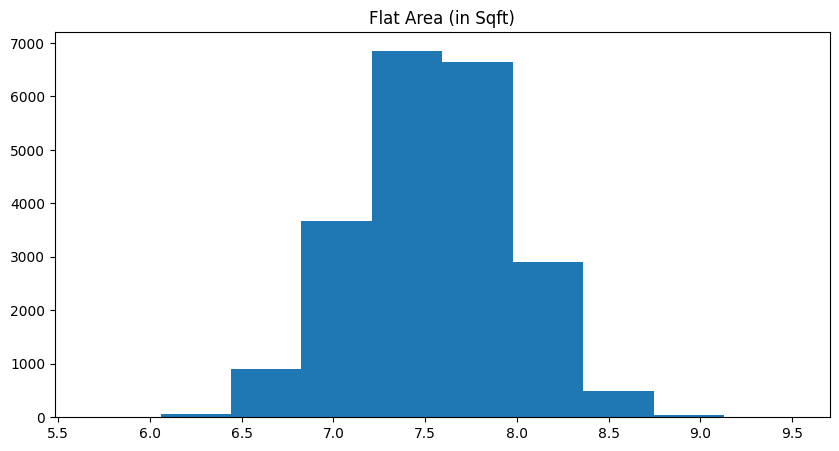

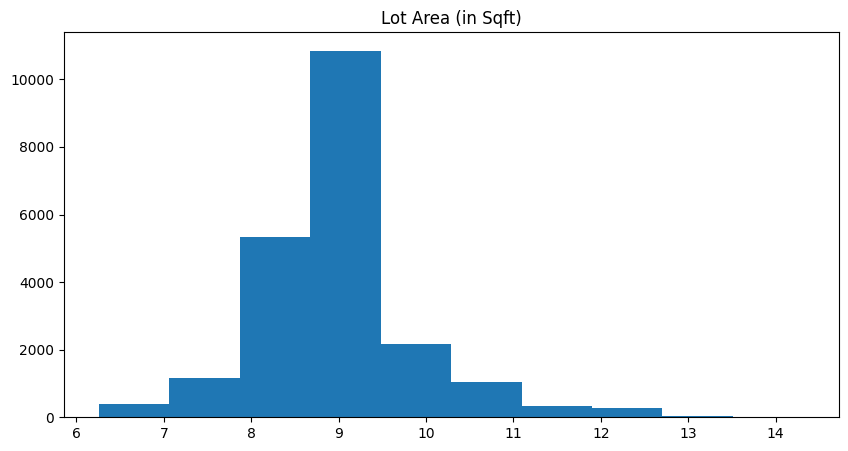

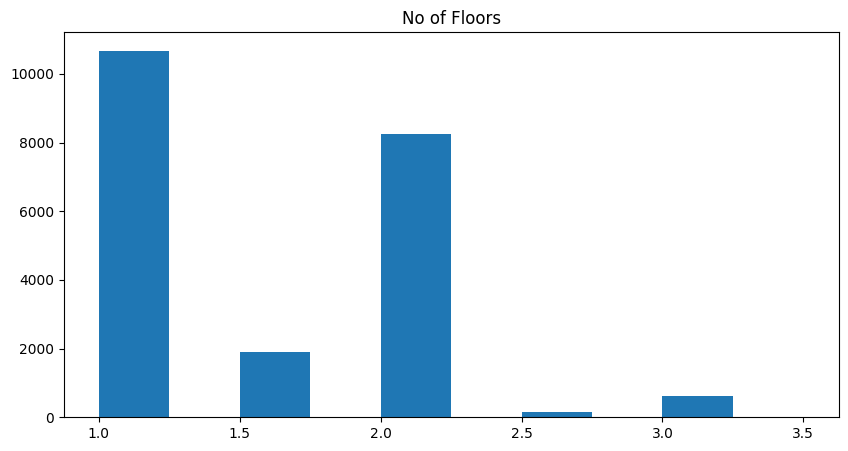

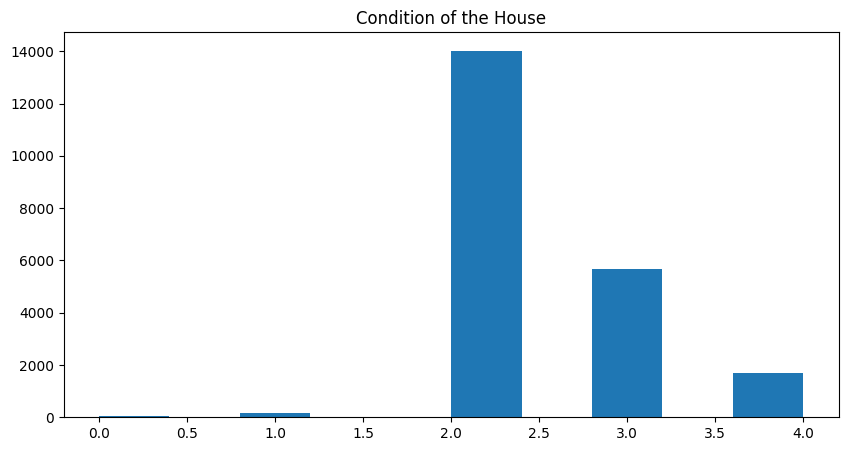

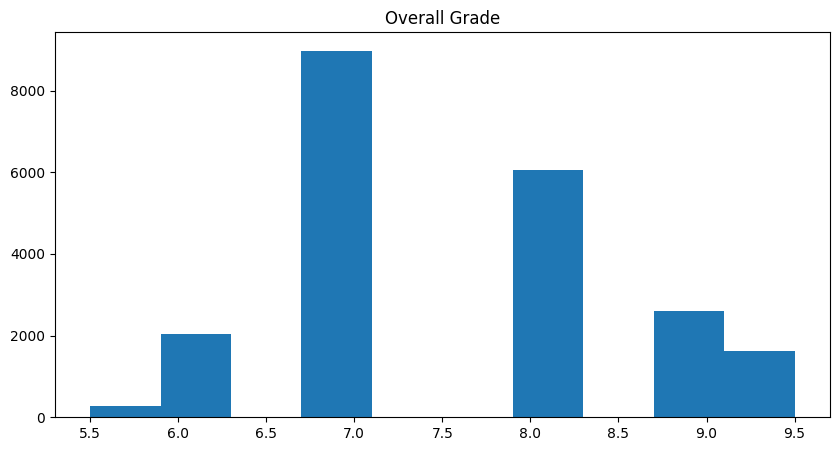

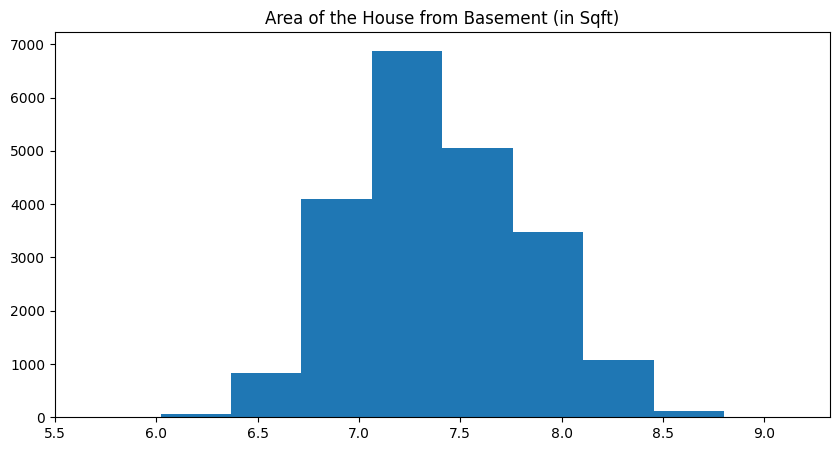

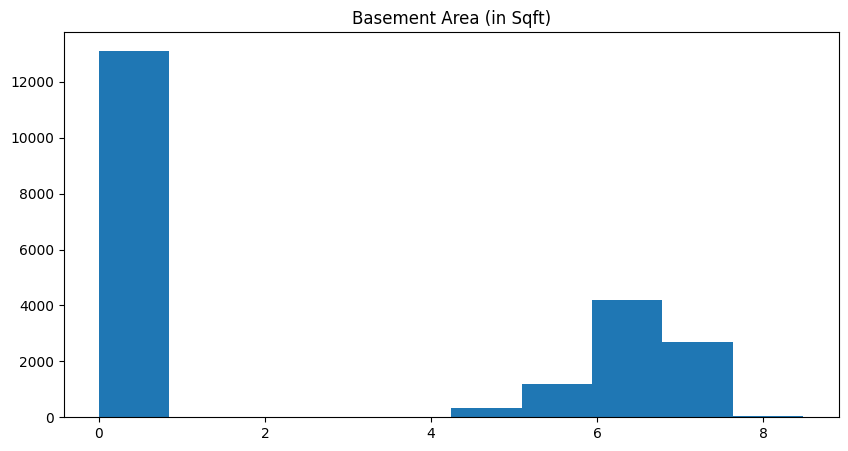

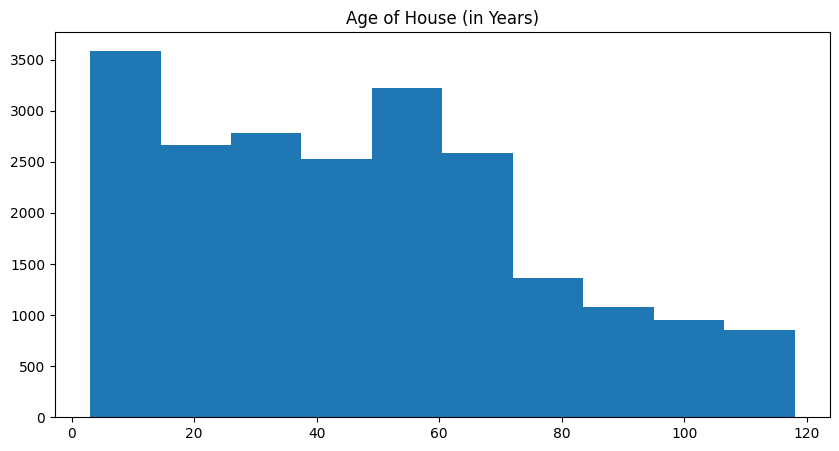

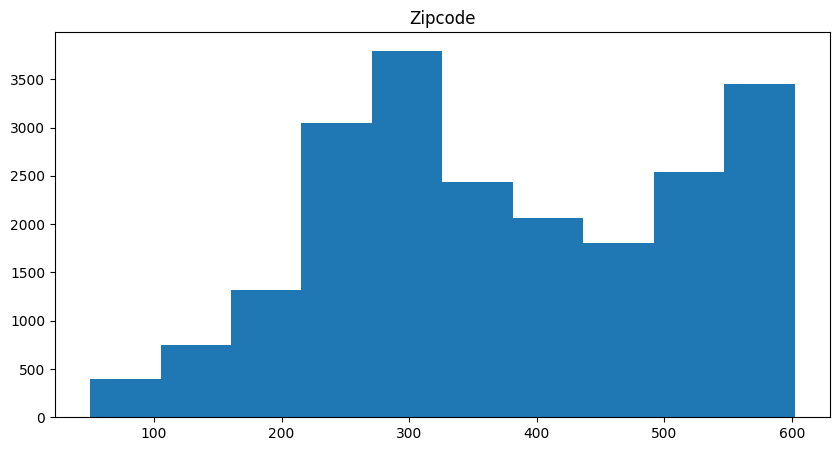

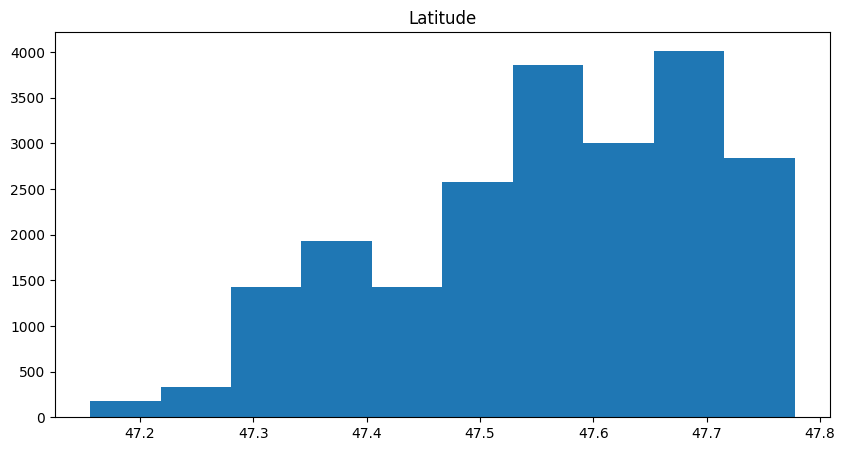

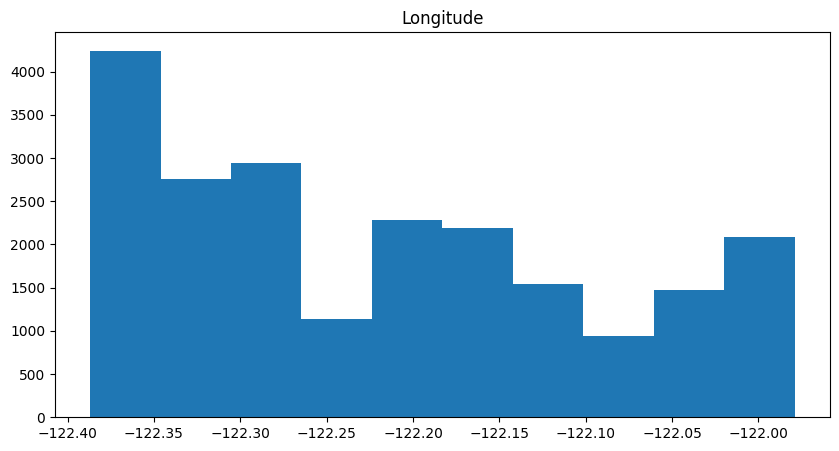

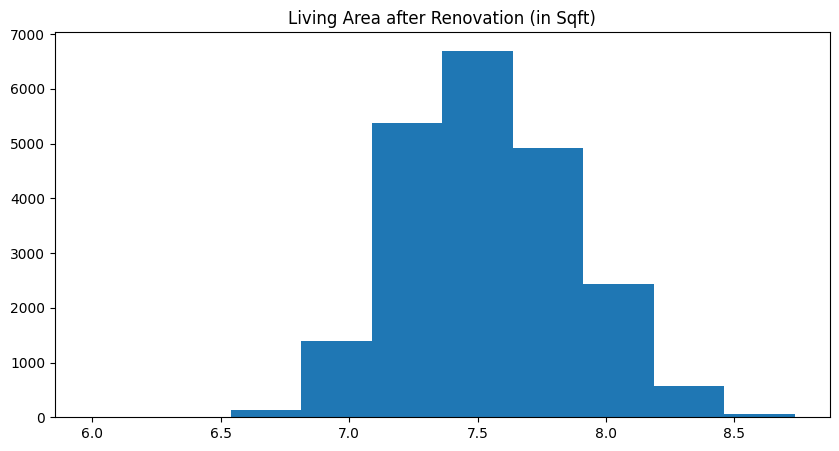

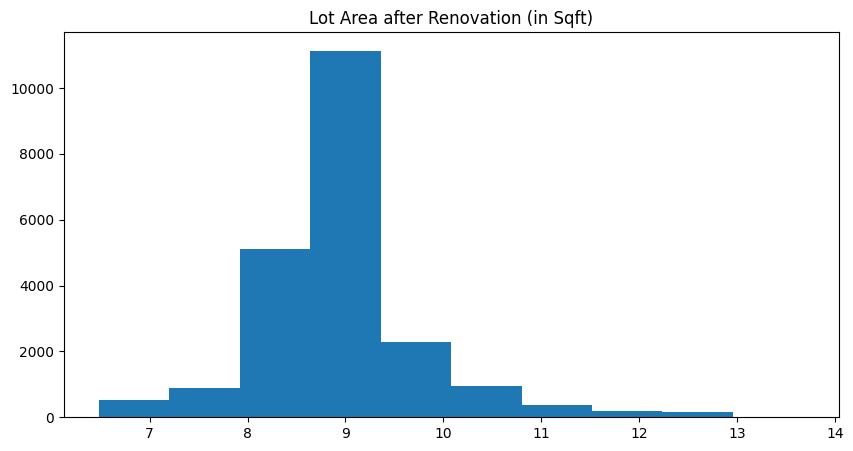

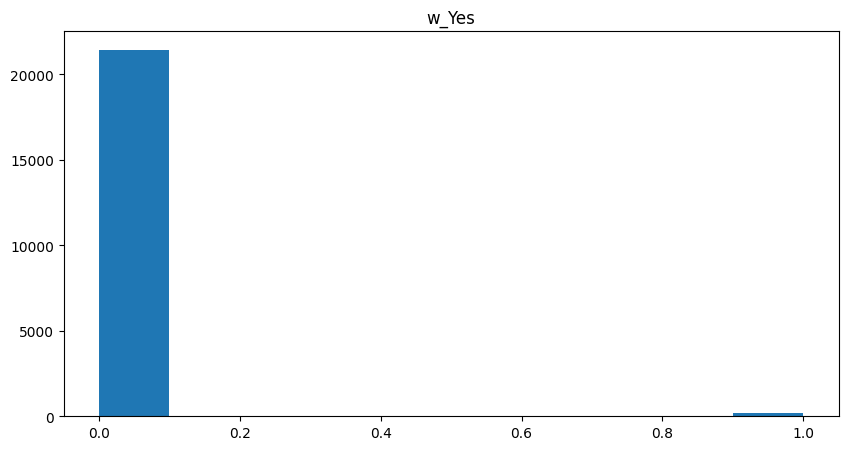

In [41]:
num_cols = df.select_dtypes(include=['int64','float64'])
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.hist(df[i])
  plt.title(i)

In [42]:
cols = ['No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)','Area of the House from Basement (in Sqft)']
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])


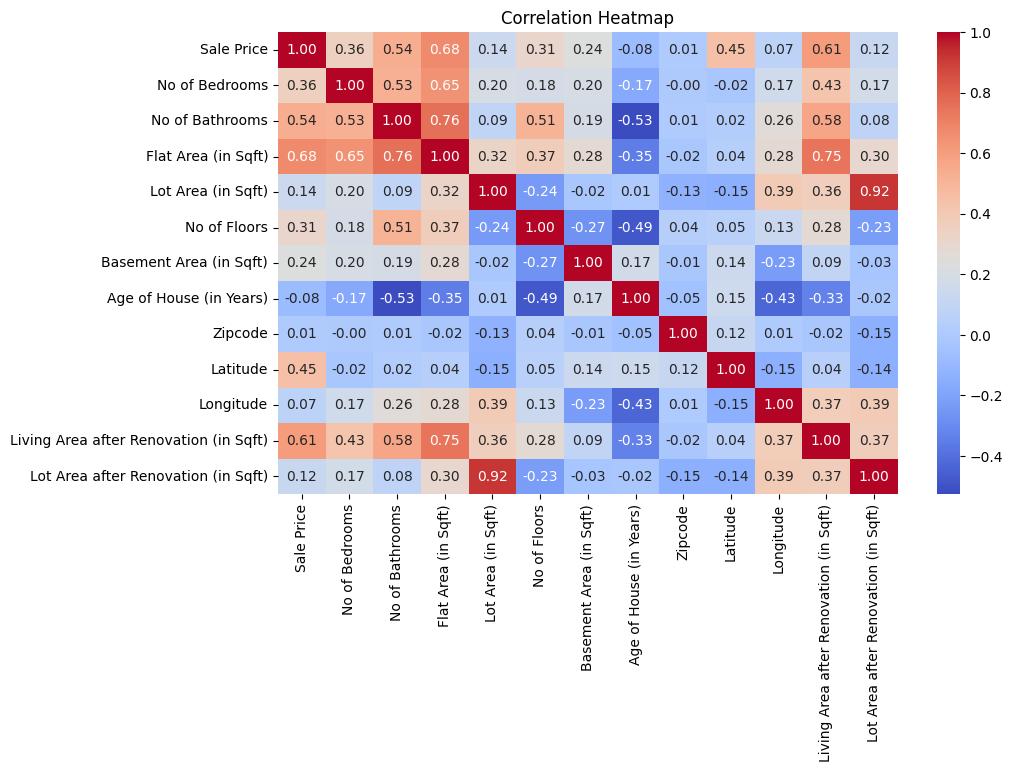

In [43]:
num_column = ['Sale Price','No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)']
corr = df[num_column].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

train test split


In [46]:
y= df['Sale Price']
x=df.drop(columns=['Sale Price'])

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train.shape

(17281, 15)

In [49]:
x_test.shape

(4321, 15)

save data

In [50]:
df.to_excel('houseprice_cleaned.xlsx')